In [16]:
import pandas as pd

# Load the CSV file (update 'TCGA_Reports.csv' with actual file path)
df = pd.read_csv("C:/Users/Medha/Documents/CSUDH/Spring2025/TCGA_Reports.csv")

# Display the first 5 rows
print(df.head())

print('\nColumns:\n',df.columns)

                                    patient_filename  \
0  TCGA-BP-5195.25c0b433-5557-4165-922e-2c1eac9c26f0   
1  TCGA-D7-8573.b7306a47-697d-4ed3-bbe1-81d49674a8f8   
2  TCGA-EI-7004.13591eed-30e5-47a3-91be-7a370663d2d4   
3  TCGA-EB-A82B.23E186C6-739C-4EF1-8788-79AA89C6E87A   
4  TCGA-A6-3808.e1505f65-72ef-438d-a5e1-93ed8bf6635d   

                                                text  
0  Date of Recelpt: Clinical Diagnosis & History:...  
1  Material: 1) Material: stomach, Method of coll...  
2  page 1 / 1. copy No. 3. Examination: Histopath...  
3  Patient ID: Gross Description: A mass is locat...  
4  SPECIMEN. Right colon. CLINICAL NOTES. PRE-OP ...  

Columns:
 Index(['patient_filename', 'text'], dtype='object')


In [25]:
print(df.info())

# Check for missing values
print('\n\nIS NULL:',df.isnull().sum())

df['Cancer_Label'] = df['text'].apply(lambda x: 1 if 'cancer' in x.lower() else 0)
print('\nCancer_Label:\n',df['Cancer_Label'].value_counts())  # Check balance

print(f"\nTotal records: {df.shape[0]}")
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))  # For TCGA
print('\n',df['text_length'].describe())

# Check unique values in each column
print('\n\nUnique:',df.nunique())

print('\n\nshape:',df.shape)  # (rows, columns)

print(df.columns)

print('\n\nnulls:',df.isnull().sum())  # Shows how many missing values per column

print('\n\ntypes:',df.dtypes)

print('\n\n',df.sample(5))  # Random 5 rows

print('\ntext')

df["text_length"] = df["text"].apply(len)
print(df["text_length"].describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9523 entries, 0 to 9522
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   patient_filename  9523 non-null   object
 1   text              9523 non-null   object
 2   Cancer_Label      9523 non-null   int64 
 3   text_length       9523 non-null   int64 
 4   Cardiac_Label     9523 non-null   int64 
 5   Skin_label        9523 non-null   int64 
 6   Blood_label       9523 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 520.9+ KB
None


IS NULL: patient_filename    0
text                0
Cancer_Label        0
text_length         0
Cardiac_Label       0
Skin_label          0
Blood_label         0
dtype: int64

Cancer_Label:
 Cancer_Label
0    6992
1    2531
Name: count, dtype: int64

Skin_label:
 Skin_label
0    8498
1    1025
Name: count, dtype: int64

Blood_label
 Blood_label
0    8626
1     897
Name: count, dtype: int64

Total records: 9523

 coun

In [26]:
##Removing Duplicates

duplicate_texts = df[df.duplicated(subset="text", keep=False)]
print(f"Number of duplicate reports: {len(duplicate_texts)}")

print('\nDrop Duplicates:')
df = df.drop_duplicates(subset="text", keep="first")
print(df.shape) 

print('\nRemove Extremely Short Texts:')
df = df[df["text_length"] > 10]  # Remove texts shorter than 10 characters
print(df.shape)  # New size after filtering

Number of duplicate reports: 34

Drop Duplicates:
(9505, 7)

Remove Extremely Short Texts:
(9504, 7)


In [32]:
print('\nNormalize Text (Lowercase, Remove Special Characters):')
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\W+", " ", text)  # Remove special characters
    return text.strip()

df["cleaned_text"] = df["text"].apply(clean_text)
print(df["cleaned_text"].head())


Normalize Text (Lowercase, Remove Special Characters):
0    date of recelpt clinical diagnosis history inc...
1    material 1 material stomach method of collecti...
2    page 1 1 copy no 3 examination histopathologic...
3    patient id gross description a mass is located...
4    specimen right colon clinical notes pre op dia...
Name: cleaned_text, dtype: object


In [33]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Step 2: Create labels based on the cleaned text
def label_report(text):
    if "cancer" in text:  # Example of keyword-based labeling
        return "Cancer"
    else:
        return "Non-Cancer"

# Apply the label creation function to both the training and test sets
X_train["label"] = X_train["cleaned_text"].apply(label_report)
X_test["label"] = X_test["cleaned_text"].apply(label_report)

# Step 3: Extract features (text) and labels (new 'label')
X_train_text = X_train["cleaned_text"]
X_test_text = X_test["cleaned_text"]
y_train = X_train["label"]
y_test = X_test["label"]

# Convert the text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# Step 4: Train the Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8850210970464135
Classification Report:
               precision    recall  f1-score   support

      Cancer       0.84      0.68      0.75       485
  Non-Cancer       0.90      0.95      0.93      1411

    accuracy                           0.89      1896
   macro avg       0.87      0.82      0.84      1896
weighted avg       0.88      0.89      0.88      1896



LOGISTIC REGRESSION : SMOTE Analysis :
Dataset Shape: (9523, 2)
First 5 rows:
                                     patient_filename  \
0  TCGA-BP-5195.25c0b433-5557-4165-922e-2c1eac9c26f0   
1  TCGA-D7-8573.b7306a47-697d-4ed3-bbe1-81d49674a8f8   
2  TCGA-EI-7004.13591eed-30e5-47a3-91be-7a370663d2d4   
3  TCGA-EB-A82B.23E186C6-739C-4EF1-8788-79AA89C6E87A   
4  TCGA-A6-3808.e1505f65-72ef-438d-a5e1-93ed8bf6635d   

                                                text  
0  Date of Recelpt: Clinical Diagnosis & History:...  
1  Material: 1) Material: stomach, Method of coll...  
2  page 1 / 1. copy No. 3. Examination: Histopath...  
3  Patient ID: Gross Description: A mass is locat...  
4  SPECIMEN. Right colon. CLINICAL NOTES. PRE-OP ...  
Columns: Index(['patient_filename', 'text'], dtype='object')
Missing values per column:
 patient_filename    0
text                0
dtype: int64
Dataset after preprocessing: (9480, 3)
Label Distribution:
 Cancer_Label
0    6968
1    2512
Name: count, dt

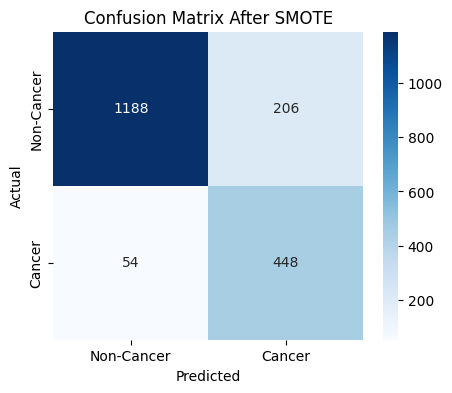

In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the TCGA Dataset
print('LOGISTIC REGRESSION : SMOTE Analysis :')
file_path = "C:/Users/Medha/Documents/CSUDH/Spring2025/TCGA_Reports.csv"  # Update file path
df = pd.read_csv(file_path)

# Display dataset info
print("Dataset Shape:", df.shape)
print("First 5 rows:\n", df.head())
print("Columns:", df.columns)

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Step 1: Preprocessing
def clean_text(text):
    if pd.isnull(text):
        return ""  # Handle NaN values
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df["Cleaned_Text"] = df["text"].apply(clean_text)  # Assuming "Findings" contains the text

# Remove duplicates and short texts
df.drop_duplicates(subset=["Cleaned_Text"], inplace=True)
df = df[df["Cleaned_Text"].str.len() > 10]

print(f"Dataset after preprocessing: {df.shape}")

# Step 2: Create Labels (Cancer vs. Non-Cancer Classification)
df["Cancer_Label"] = df["Cleaned_Text"].str.contains("cancer", case=False, na=False).astype(int)

# Check label distribution
print("Label Distribution:\n", df["Cancer_Label"].value_counts())

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df["Cleaned_Text"])
y = df["Cancer_Label"]

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"Resampled dataset shape:\n{y_train_res.value_counts()}")

# Step 4: Train Logistic Regression Model on Balanced Data
model_smote = LogisticRegression(random_state=42, max_iter=1000)
model_smote.fit(X_train_res, y_train_res)

# Make predictions
y_pred_smote = model_smote.predict(X_test)

# Step 5: Evaluate Model Performance
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report After SMOTE:\n", classification_report(y_test, y_pred_smote))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Cancer", "Cancer"], yticklabels=["Non-Cancer", "Cancer"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix After SMOTE")
plt.show()


In [30]:
from imblearn.over_sampling import BorderlineSMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

print("Columns:", df.columns)

# Define features (X) and target labels (y)
X = df["Cleaned_Text"]  # Ensure this is preprocessed text
y = df["Cancer_Label"]  # Binary labels (Cancer = 1, Non-Cancer = 0)

# Convert text to numerical features (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Try Borderline SMOTE
border_smote = BorderlineSMOTE(kind='borderline-1', random_state=42)
X_resampled_smote, y_resampled_smote = border_smote.fit_resample(X_train, y_train)

# Train logistic regression on Borderline SMOTE data
model_smote = LogisticRegression()
model_smote.fit(X_resampled_smote, y_resampled_smote)
y_pred_smote = model_smote.predict(X_test)

# Print classification report for Borderline SMOTE
print("Classification Report (Borderline SMOTE):\n", classification_report(y_test, y_pred_smote))

# Try ADASYN
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, y_train)

# Train logistic regression on ADASYN data
model_adasyn = LogisticRegression()
model_adasyn.fit(X_resampled_adasyn, y_resampled_adasyn)
y_pred_adasyn = model_adasyn.predict(X_test)

# Print classification report for ADASYN
print("Classification Report (ADASYN):\n", classification_report(y_test, y_pred_adasyn))


Columns: Index(['patient_filename', 'text', 'Cleaned_Text', 'Cancer_Label'], dtype='object')
Classification Report (Borderline SMOTE):
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      1411
           1       0.66      0.92      0.77       485

    accuracy                           0.86      1896
   macro avg       0.82      0.88      0.84      1896
weighted avg       0.89      0.86      0.87      1896

Classification Report (ADASYN):
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      1411
           1       0.66      0.92      0.77       485

    accuracy                           0.86      1896
   macro avg       0.82      0.88      0.83      1896
weighted avg       0.89      0.86      0.87      1896



In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve

# Train Logistic Regression with class weights
model_weighted = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
model_weighted.fit(X_train, y_train)

# Get probability predictions
y_probs = model_weighted.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (Cancer)

# Adjust the decision threshold (default is 0.5, let's try 0.3)
threshold = 0.3
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Print classification report for adjusted threshold
print(f"\nClassification Report (Threshold = {threshold}):\n", classification_report(y_test, y_pred_adjusted))


Classification Report (Threshold = 0.3):
               precision    recall  f1-score   support

           0       0.98      0.71      0.82      1411
           1       0.53      0.96      0.68       485

    accuracy                           0.77      1896
   macro avg       0.76      0.83      0.75      1896
weighted avg       0.87      0.77      0.79      1896



In [31]:
'''print('LOGISTIC REGRESSION : \n\nSplitting the data into training and testing sets :')
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Extract features (text) and labels (you can use the 'patient_filename' as an example label for now)
X_train_text = X_train["cleaned_text"]
X_test_text = X_test["cleaned_text"]
'''
'''print('LOGISTIC REGRESSION : \n\n Feature Extraction (TF-IDF):')
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most important words
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# Check the shape of the transformed data
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)'''

 Feature Extraction (TF-IDF):
(7603, 5000)
(1901, 5000)


In [33]:
'''print('LOGISTIC REGRESSION : \n\nTraining a Logistic Regression Model:')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assuming the 'patient_filename' column is the label
y_train = X_train["patient_filename"]
y_test = X_test["patient_filename"]

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))'''


Training a Logistic Regression Model:
Accuracy: 0.0


C:\Users\Medha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Medha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Medha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Classification Report:
                                                    precision    recall  f1-score   support

TCGA-02-2466.e9e97b51-1474-463b-8693-7b66f74319c9       0.00      0.00      0.00       0.0
TCGA-02-2470.e21f66d9-e124-43d7-81fe-489d15d69cbf       0.00      0.00      0.00       1.0
TCGA-02-2483.e73f6ba1-564c-4fea-b088-f2357ff49ee7       0.00      0.00      0.00       1.0
TCGA-02-2486.26e31c62-06a2-4906-a1d5-985dc0f961e4       0.00      0.00      0.00       0.0
TCGA-05-4245.902fe548-5b93-49c9-81db-2af4a4a88f3c       0.00      0.00      0.00       1.0
TCGA-05-4390.2e3faad1-3a5e-4efb-96ea-8c44839fec6e       0.00      0.00      0.00       0.0
TCGA-05-4398.37d9ee69-f24e-4dda-a283-078243db1fa8       0.00      0.00      0.00       0.0
TCGA-05-4405.AB2C32B2-3CB1-4977-8C79-7B19F9022DFB       0.00      0.00      0.00       1.0
TCGA-05-4418.4d77e536-98f2-4e34-9e76-adb4bc79bf5e       0.00      0.00      0.00       1.0
TCGA-05-4425.adafa26d-044f-4b01-804a-5066ee20ceb6       0.00     

C:\Users\Medha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Medha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
